# 1. K-Nearest Neighbors (KNN) – Customer Classification

Business Context: Predicting if a customer will buy a product based on demographic data.
Dataset: Assume a dataset with customer demographics like Age, Income, and whether they purchased the product (Yes/No).

In [3]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Sample dataset (assumed structure)
data = {
    'Age': [25, 34, 45, 23, 35, 40, 29, 30],
    'Income': [40000, 54000, 58000, 32000, 48000, 61000, 38000, 43000],
    'Purchased': [0, 1, 1, 0, 1, 1, 0, 0]  # 1 for Purchased, 0 for Not Purchased
}
df = pd.DataFrame(data)
df

,Age,Income,Purchased
0,25,40000,0
1,34,54000,1
2,45,58000,1
3,23,32000,0
4,35,48000,1
5,40,61000,1
6,29,38000,0
7,30,43000,0


In [5]:
# Splitting dataset
X = df[['Age', 'Income']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Applying KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Prediction and evaluation
y_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


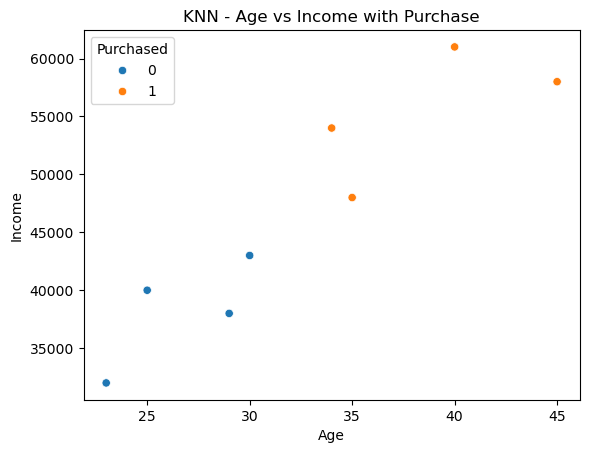

In [9]:
# Visualization
sns.scatterplot(x='Age', y='Income', hue='Purchased', data=df)
plt.title('KNN - Age vs Income with Purchase')
plt.show()

# 2. K-Means Clustering – Customer Segmentation

## Business Context: Segmenting customers based on their spending habits to tailor marketing strategies

##### Dataset: Use the Mall Customer Segmentation Data (features like Annual Income and Spending Score).

In [13]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [14]:
# Creating a synthetic dataset for demonstration
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=42)

In [15]:
# Applying K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


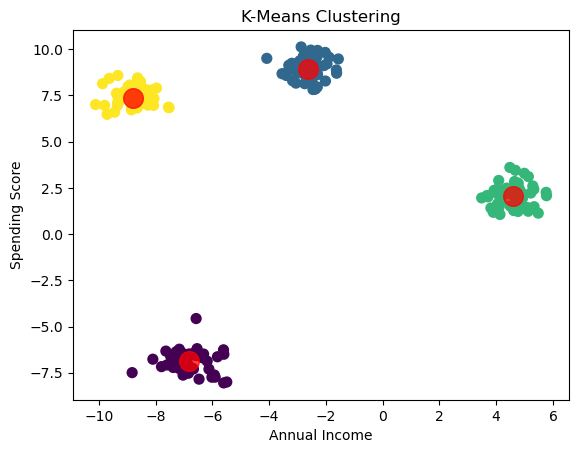

In [16]:
# Visualization of clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# 3. Decision Trees – Customer Churn Prediction

## Business Context: Predicting customer churn based on features like tenure, contract type, and monthly charges.

#### Dataset: A telecommunications customer dataset containing features like Tenure, MonthlyCharges, and Churn.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [21]:
# Assumed dataset
data = {
    'Tenure': [1, 12, 24, 5, 16, 22, 2, 3],
    'MonthlyCharges': [80, 50, 70, 90, 40, 60, 85, 55],
    'Churn': [1, 0, 0, 1, 0, 0, 1, 0]  # 1 for Churn, 0 for No Churn
}
df2= pd.DataFrame(data)

In [22]:
df2

,Tenure,MonthlyCharges,Churn
0,1,80,1
1,12,50,0
2,24,70,0
3,5,90,1
4,16,40,0
5,22,60,0
6,2,85,1
7,3,55,0


In [23]:
# Splitting dataset
X = df2[['Tenure', 'MonthlyCharges']]
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Training Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Predict and evaluate
y_pred = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


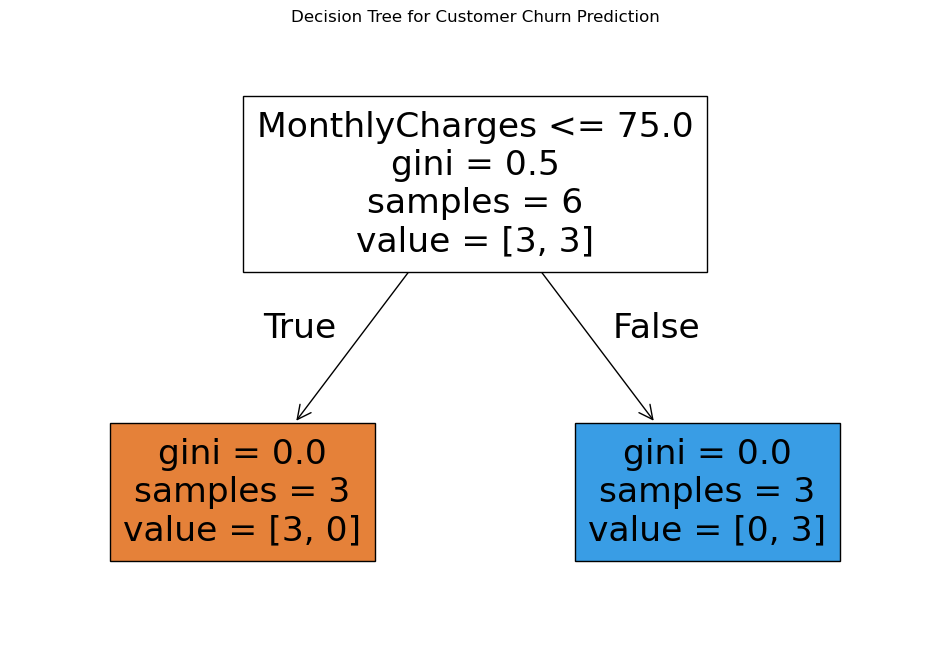

In [26]:
# Visualizing the tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtree, filled=True, feature_names=['Tenure', 'MonthlyCharges'])
plt.title('Decision Tree for Customer Churn Prediction')
plt.show()

# 4. PCA (Principal Component Analysis) – Dimensionality Reduction

#### Business Context: Reducing the dimensionality of a dataset with many features, such as stock market indicators, while preserving important patterns.

## Dataset: A dataset with multiple financial indicators like stock prices, interest rates, and GDP.

In [30]:
from sklearn.decomposition import PCA
import numpy as np

In [31]:
# Creating a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 financial indicators

In [32]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

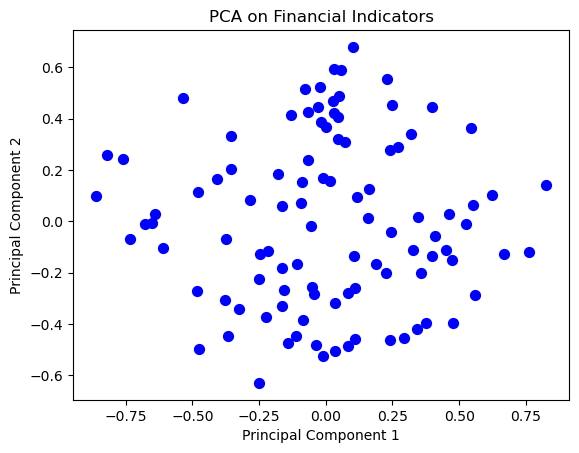

In [33]:
# Visualizing the reduced components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', s=50)
plt.title('PCA on Financial Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.28857914 0.23635118]


# 5. Support Vector Machine (SVM) – Credit Risk Prediction

### Dataset: A credit dataset with features like Credit Score, Income, and Default.

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [38]:
# Sample dataset
data = {
    'CreditScore': [650, 700, 580, 750, 620, 680, 640, 710],
    'Income': [30000, 50000, 20000, 80000, 25000, 45000, 32000, 60000],
    'Default': [0, 0, 1, 0, 1, 0, 1, 0]  # 1 for Default, 0 for No Default
}

In [39]:
df3 = pd.DataFrame(data)

In [40]:
# Splitting dataset
X = df3[['CreditScore', 'Income']]
y = df3['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Training SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 1.0


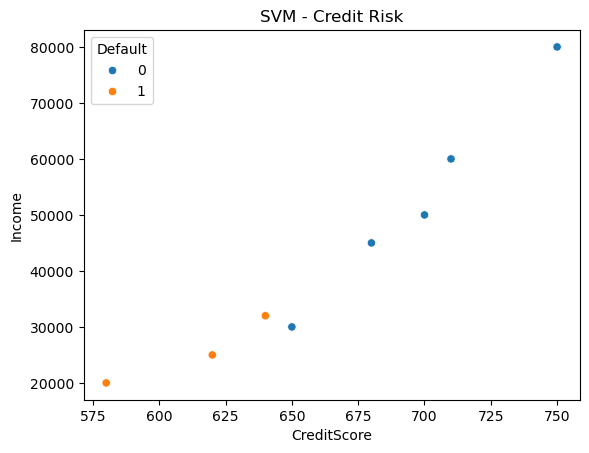

In [43]:
# Visualization
sns.scatterplot(x='CreditScore', y='Income', hue='Default', data=df3)
plt.title('SVM - Credit Risk')
plt.show()

# 6. Random Forest – Sales Prediction

## Business Context: Predicting future sales based on past data and various external factors such as advertising and promotions.

#### Dataset: A retail sales dataset with features like Ad Spend, Promotions, and Sales.

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Sample dataset
data = {
    'AdSpend': [500, 600, 300, 700, 400, 500, 800, 600],
    'Promotions': [1, 0, 0, 1, 0, 1, 1, 0],
    'Sales': [3000, 3200, 2000, 3800, 2500, 2900, 4200, 3100]
}
df4 = pd.DataFrame(data)

In [49]:
df4

,AdSpend,Promotions,Sales
0,500,1,3000
1,600,0,3200
2,300,0,2000
3,700,1,3800
4,400,0,2500
5,500,1,2900
6,800,1,4200
7,600,0,3100


In [50]:
# Splitting dataset
X = df4[['AdSpend', 'Promotions']]
y = df4['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Training Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Random Forest Sales Predictions:", y_pred)

Random Forest Sales Predictions: [2992. 3043.]


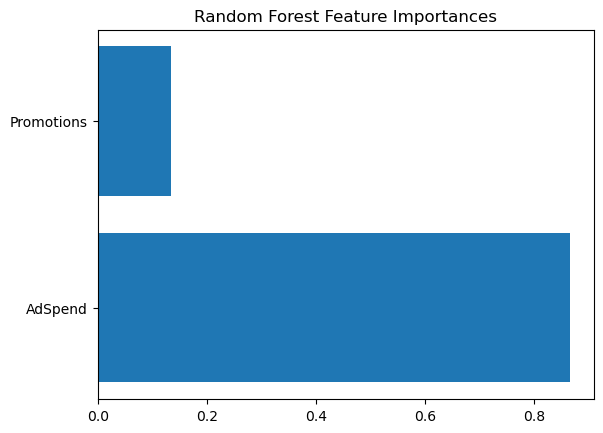

In [53]:
# Visualization of Feature Importances
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.title('Random Forest Feature Importances')
plt.show()

# 1. Sales Forecasting Using Random Forest

Business Context:
We want to forecast sales based on factors like advertising spend, promotions, and seasonal variations.

Dataset Example:
Assume we have a dataset with historical data for a retail company:

AdSpend: Advertising budget for each period.
Promotions: Whether a promotion was run in a given period (binary: 0 for no promotion, 1 for promotion).
Season: Categorical variable representing seasons (e.g., Spring, Summer, Fall, Winter).
Sales: Actual sales in that period (target variable).

Root Mean Squared Error (RMSE): 360.6976258345634


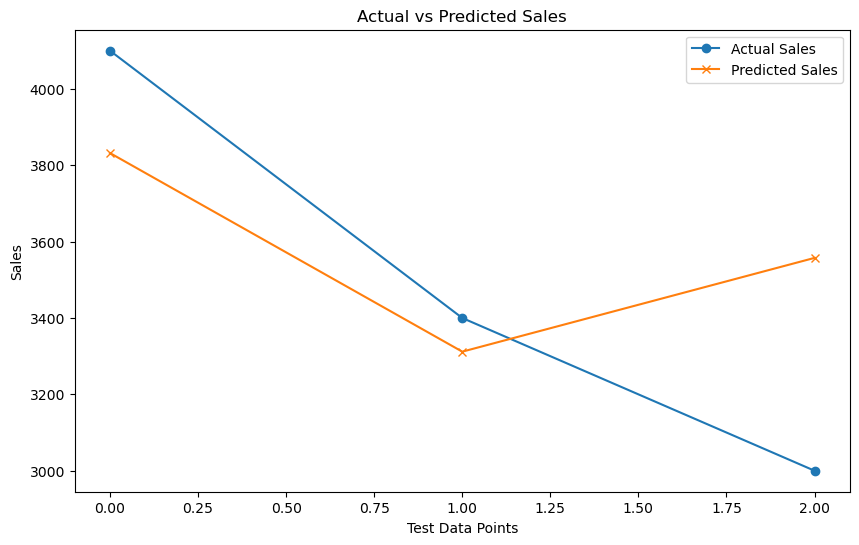

In [111]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'AdSpend': [500, 600, 300, 700, 400, 500, 800, 600, 650, 500, 750, 500],
    'Promotions': [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1],
    'Season': ['Summer', 'Fall', 'Fall', 'Winter', 'Winter', 'Spring', 'Spring', 'Summer', 'Summer', 'Fall', 'Winter', 'Spring'],
    'Sales': [3000, 3200, 2500, 4000, 2800, 3500, 4200, 3700, 3900, 3400, 4100, 3600]
}
df = pd.DataFrame(data)

# One-hot encoding the 'Season' variable
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# Splitting dataset into features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting sales on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Sales')
plt.legend()
plt.show()


Explanation:
Data Preparation:

The dataset includes advertising spend, promotion status, season, and sales.
We apply one-hot encoding to convert the categorical Season column into numerical values for use in the machine learning model.
Train-Test Split:

The data is split into a training set (80%) and a test set (20%) using train_test_split.
Random Forest Regressor:

A Random Forest Regressor model is trained on the training data.
The model is used to predict sales for the test data, and the predictions are evaluated using Root Mean Squared Error (RMSE).
Visualization:

We plot the actual vs predicted sales to visually assess the model's performance.
Output Example:
The model will output the Root Mean Squared Error (RMSE), which helps assess the prediction accuracy. A lower RMSE indicates better model performance.
A line plot of actual vs predicted sales provides visual insights into how well the model is capturing the sales patterns.

# Visualizing Feature Importance:

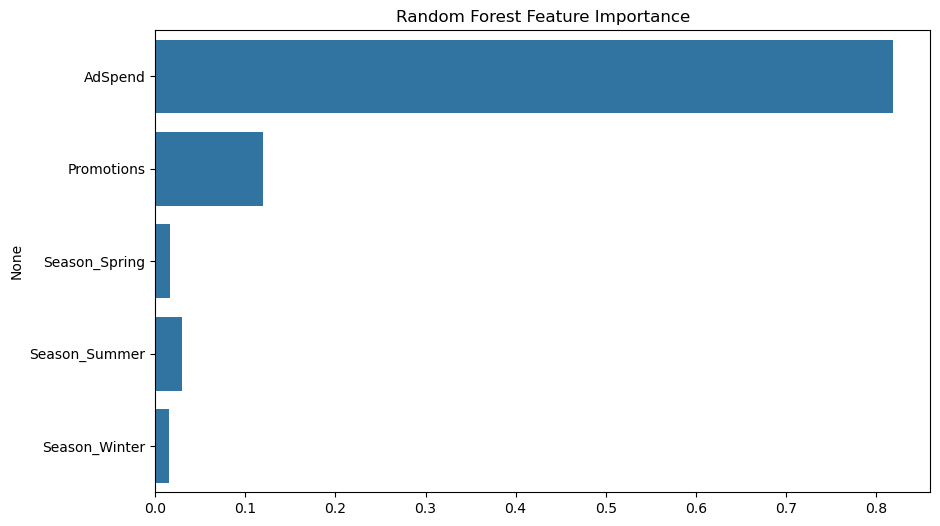

In [114]:
# Visualizing Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Random Forest Feature Importance')
plt.show()


# 1. Time Series Forecasting Using ARIMA


Dataset Example:
A time series dataset with columns:

Date: Time period of the sales data (daily, monthly, or yearly).
Sales: Total sales for that period.

C:\Users\User\AppData\Local\Temp\ipykernel_1648\3180263078.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),


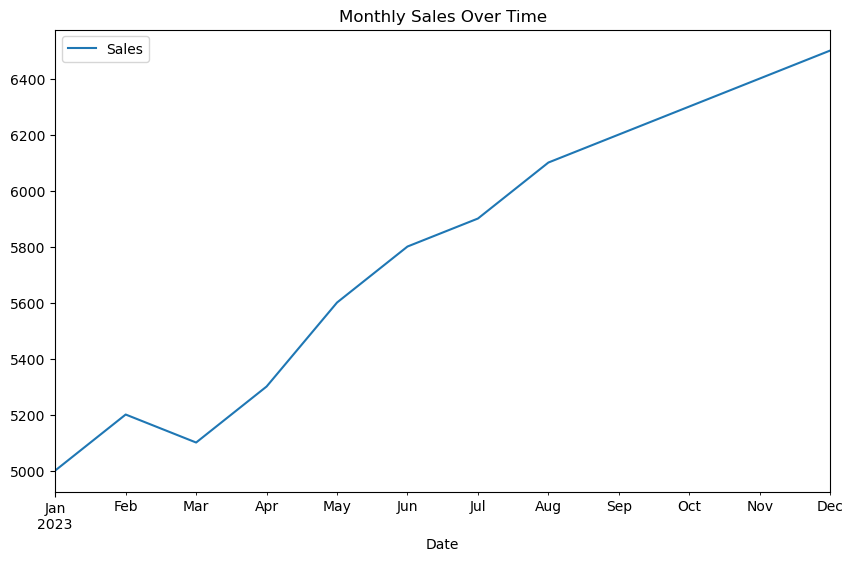

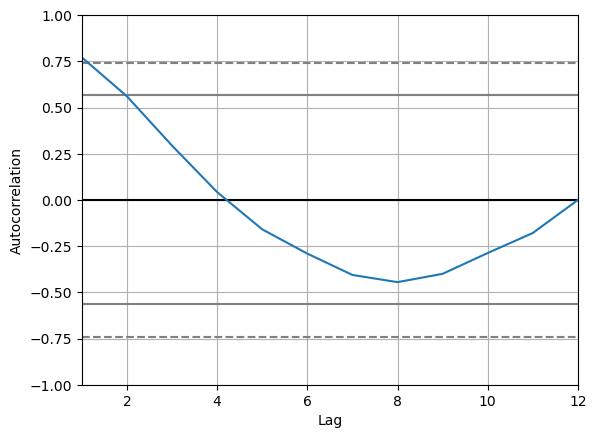

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [117]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

# Sample dataset with time series
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [5000, 5200, 5100, 5300, 5600, 5800, 5900, 6100, 6200, 6300, 6400, 6500]
}
df = pd.DataFrame(data)

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Visualizing the sales data over time
df.plot(figsize=(10,6), title='Monthly Sales Over Time')
plt.show()

# Autocorrelation plot to check for patterns
autocorrelation_plot(df['Sales'])
plt.show()

# Fitting ARIMA model (p=1, d=1, q=1)
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit(disp=False)

# Forecasting future sales
forecast = model_fit.forecast(steps=6)[0]  # Forecasting next 6 months

# Creating a DataFrame for forecasted sales
forecast_dates = pd.date_range(start='2024-01-01', periods=6, freq='M')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date', inplace=True)

# Plotting actual vs forecasted sales
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast_df.index, forecast_df['Forecasted_Sales'], label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


Explanation:
Autocorrelation Plot: This helps to visualize the repeating patterns or trends in the data, such as seasonality or lags in sales.
ARIMA Model: We fit an ARIMA model using the order (p=1, d=1, q=1) where p is the autoregressive term
, d is the degree of differencing, and q is the moving average term.
Forecasting: We forecast sales for the next 6 months and plot the actual vs forecasted sales.

# 2. LSTM for Time Series Forecasting (Deep Learning)

### LSTM (Long Short-Term Memory) networks are a type of Recurrent Neural Network (RNN) capable of learning order dependencies in time series data. This is useful for long-term sales forecasting.

In [121]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Sales': [5000, 5200, 5100, 5300, 5600, 5800, 5900, 6100, 6200, 6300, 6400, 6500]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Creating a dataset suitable for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Number of previous time steps to use as input variables to predict the next time period
X, y = create_dataset(scaled_data, look_back)

# Reshaping input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], look_back, 1))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X, y, batch_size=1, epochs=100)

# Forecasting future sales (next 6 months)
forecasted_sales = []
last_data = scaled_data[-look_back:]
for _ in range(6):
    next_sales = model.predict(np.reshape(last_data, (1, look_back, 1)))[0]
    forecasted_sales.append(next_sales[0])
    last_data = np.append(last_data[1:], next_sales).reshape(-1, 1)

# Rescale forecasted sales back to original values
forecasted_sales = scaler.inverse_transform(np.array(forecasted_sales).reshape(-1, 1))

# Creating a DataFrame for forecasted sales
forecast_dates = pd.date_range(start='2024-01-01', periods=6, freq='M')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecasted_sales.flatten()})
forecast_df.set_index('Date', inplace=True)

# Plotting actual vs forecasted sales
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast_df.index, forecast_df['Forecasted_Sales'], label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecast Using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'keras'